In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [30]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [31]:
training_set=train.iloc[:,1:2].values

In [32]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [33]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [34]:
training_set_scaled.shape

(1258, 1)

In [35]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [36]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
X_train.shape

(1198, 60, 1)

In [38]:
regressor=Sequential()

In [39]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

In [40]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [41]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [42]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [43]:
regressor.add(Dense(units=1))

In [44]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0490
Epoch 2/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0101
Epoch 3/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0080
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0071
Epoch 5/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0070
Epoch 6/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0064
Epoch 7/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0055
Epoch 8/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0051
Epoch 10/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0053
Epoch 11/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0055
Epoch 12/100
1198/1198 [============================

In [46]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [47]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [48]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [59]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

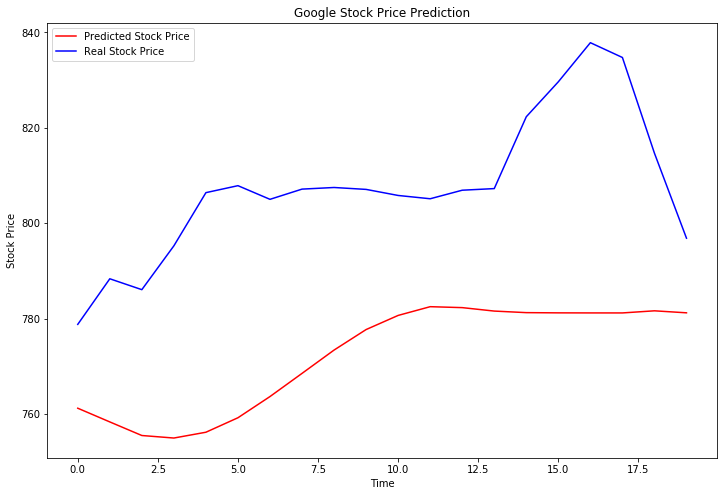

In [69]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()